In [1]:
import pandas as pd

In [2]:
request = pd.read_excel("C:/Users/PIAI/insu_request_processing.xlsx")
request.head()

,customer_id,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,req_id,...,sick_3rd,dg_cat,dg_start_date,dg_end_date,dg_duration,insu_req_amount,insu_pay_amount,insu_pay_date,insu_duration,insu_cum_amount
0,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20101118-12660-01-001,...,NaN,외래,24-Oct-15,16-Nov-15,24,424498,724498,18-Nov-15,11,1320000
1,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,외래,17-Feb-16,17-Feb-16,1,34950,490079,13-Mar-16,15,1800000
2,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,외래,24-Feb-16,24-Feb-16,1,0,490079,13-Mar-16,15,1800000
3,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,외래,02-Mar-16,02-Mar-16,1,0,490079,13-Mar-16,15,1800000
4,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,...,NaN,외래,09-Mar-16,09-Mar-16,1,16000,490079,13-Mar-16,15,1800000


In [3]:
request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42243 entries, 0 to 42242
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         42243 non-null  object
 1   review_cat          42243 non-null  object
 2   judge               42243 non-null  object
 3   gender              42243 non-null  int64 
 4   age                 42243 non-null  int64 
 5   insu_id             42243 non-null  object
 6   insu_contract_date  42243 non-null  object
 7   insu_prod_id        42243 non-null  object
 8   insu_prod_name      42243 non-null  object
 9   req_id              42243 non-null  object
 10  req_id_seq          42243 non-null  int64 
 11  sick_main           42243 non-null  object
 12  sick_1st            42243 non-null  object
 13  sick_2nd            11488 non-null  object
 14  sick_3rd            4838 non-null   object
 15  dg_cat              42243 non-null  object
 16  dg_start_date       42

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# matplotlib 패키지 한글 깨짐 처리 해결
plt.rc('font', family='Malgun Gothic')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

### 범주형

##### 검사구분(review_cat)

In [5]:
request['review_cat'].value_counts()

혈액검사    32203
일반검진    10040
Name: review_cat, dtype: int64

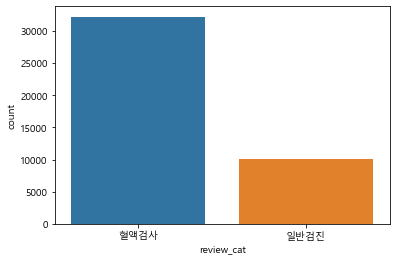

In [6]:
sns.countplot(x="review_cat", data=request)

In [7]:
request['review_cat'].value_counts(normalize=True).round(2) * 100

혈액검사    76.0
일반검진    24.0
Name: review_cat, dtype: float64

##### 판정결과(judge)

In [8]:
request['judge'].value_counts()

재검    24522
승인    17721
Name: judge, dtype: int64

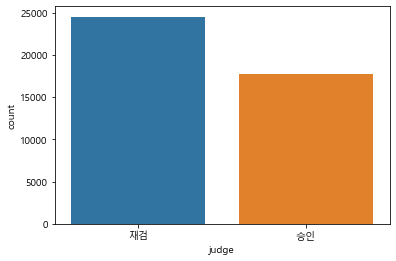

In [9]:
sns.countplot(x="judge", data=request)

In [10]:
request['judge'].value_counts(normalize=True).round(2) * 100

재검    58.0
승인    42.0
Name: judge, dtype: float64

##### 성별(gender)

In [11]:
request['gender'] = request['gender'].map({1:'남성', 2:'여성'})
request['gender'].value_counts()

여성    29495
남성    12748
Name: gender, dtype: int64

In [12]:
request['gender'].value_counts()

여성    29495
남성    12748
Name: gender, dtype: int64

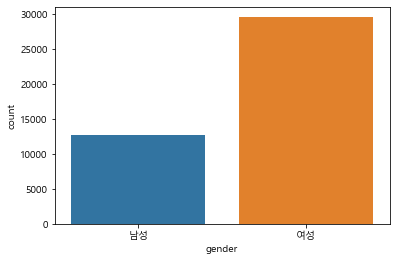

In [13]:
sns.countplot(x="gender", data=request)

In [14]:
request['gender'].value_counts(normalize=True).round(2) * 100

여성    70.0
남성    30.0
Name: gender, dtype: float64

##### 주상병(sick_main) unique로 수정필요

In [15]:
from collections import Counter

# 데이터를 카운트
cnt = Counter(request['sick_main'])

# 상위 3개의 최빈값을 출력
print(cnt.most_common()[:3])

[('S33', 2328), ('M79', 1999), ('M75', 1390)]


S33이 2328개, M79이 1999개, M75가 1390개임을 알 수 있다.

##### 상병코드1(sick_1st)

In [16]:
from collections import Counter

# 데이터를 카운트
cnt = Counter(request['sick_1st'])

# 상위 3개의 최빈값을 출력
print(cnt.most_common()[:3])

[('M79', 1861), ('S33', 1450), ('J00', 1371)]


##### 상병코드2(sick_2nd)

In [17]:
from collections import Counter

# 데이터를 카운트
cnt = Counter(request['sick_2nd'])

# 상위 3개의 최빈값을 출력
print(cnt.most_common()[:3])

[(nan, 30755), ('S13', 424), ('S335', 392)]


##### 상병코드3(sick_3rd)

In [18]:
from collections import Counter

# 데이터를 카운트
cnt = Counter(request['sick_3rd'])

# 상위 4개의 최빈값을 출력
print(cnt.most_common()[:4])

[(nan, 37405), ('S93', 202), ('S934', 201), ('S134', 165)]


##### 진단유형(dg_cat)

In [19]:
request['dg_cat'].value_counts()

외래    38642
입원     3601
Name: dg_cat, dtype: int64

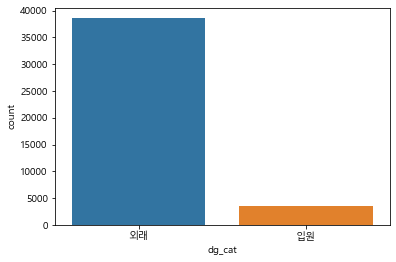

In [20]:
sns.countplot(x="dg_cat", data=request)

In [21]:
request['dg_cat'].value_counts(normalize=True).round(2) * 100

외래    91.0
입원     9.0
Name: dg_cat, dtype: float64

##### 보험상품명(insu_prod_name) unique로 수정필요

In [22]:
request['insu_prod_name'].value_counts()

조심조심 보험 4        10376
건강보험              6282
울라트 보험            6109
평생 건강 보장 1        5474
All My Life 2     2318
건강 보살핌            1708
안심보험              1195
통합보험 +1           1184
가족 만족 보험 2        1161
All My Life 1     1093
가족 만족 보험 1         974
가족 만족 보험 2+        778
평생 보험 2            673
평생 보험 1            585
건강보험 3             485
건강+행복 보험           366
단체보험(상해)           316
조심조심 보험 1          316
통합보험 +3            306
통합보험 +2            292
조심조심 보험 2          252
Name: insu_prod_name, dtype: int64

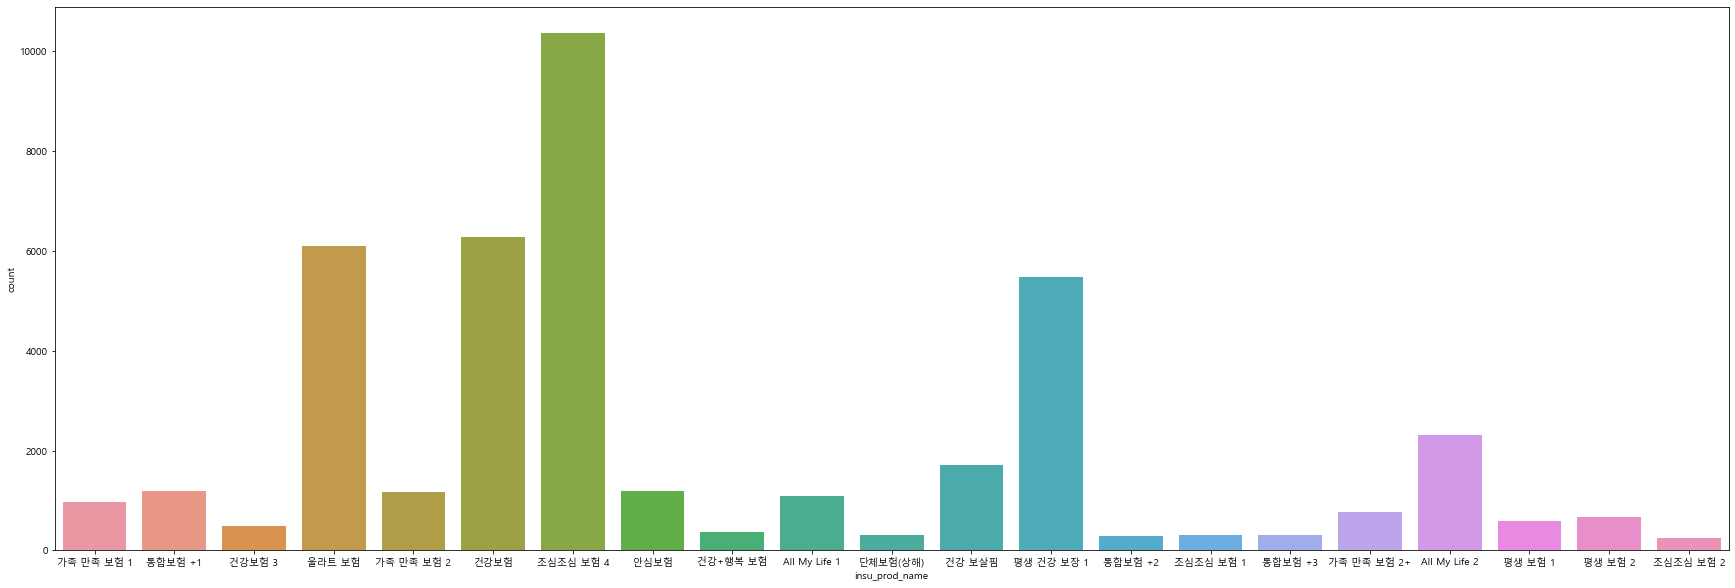

In [23]:
fig, ax = plt.subplots(figsize=(30,10))
sns.countplot(x="insu_prod_name", data=request)

In [24]:
request['insu_prod_name'].value_counts(normalize=True).round(2) * 100

조심조심 보험 4        25.0
건강보험             15.0
울라트 보험           14.0
평생 건강 보장 1       13.0
All My Life 2     5.0
건강 보살핌            4.0
안심보험              3.0
통합보험 +1           3.0
가족 만족 보험 2        3.0
All My Life 1     3.0
가족 만족 보험 1        2.0
가족 만족 보험 2+       2.0
평생 보험 2           2.0
평생 보험 1           1.0
건강보험 3            1.0
건강+행복 보험          1.0
단체보험(상해)          1.0
조심조심 보험 1         1.0
통합보험 +3           1.0
통합보험 +2           1.0
조심조심 보험 2         1.0
Name: insu_prod_name, dtype: float64

### 연속형

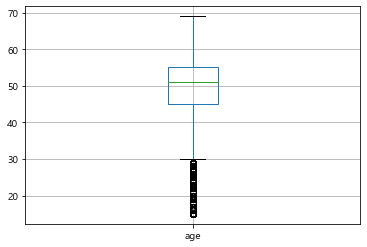

In [25]:
request.boxplot('age')

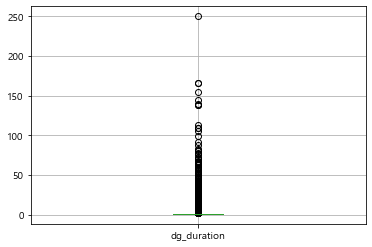

In [26]:
request.boxplot('dg_duration')

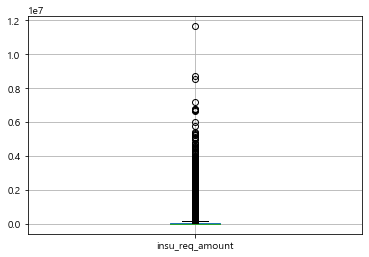

In [27]:
request.boxplot('insu_req_amount')

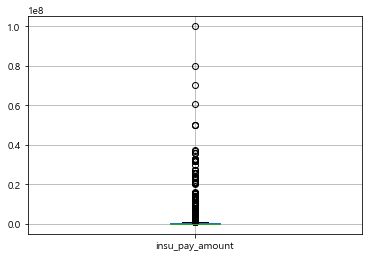

In [28]:
request.boxplot('insu_pay_amount')

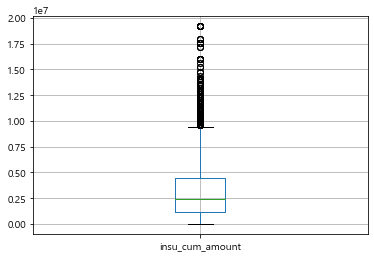

In [29]:
request.boxplot('insu_cum_amount')

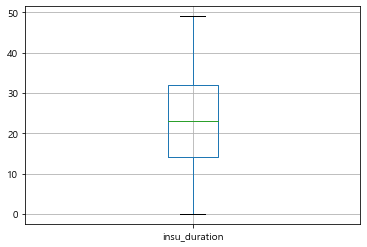

In [30]:
request.boxplot('insu_duration')

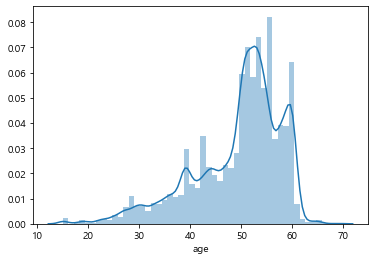

In [31]:
sns.distplot(request['age'], kde=True)

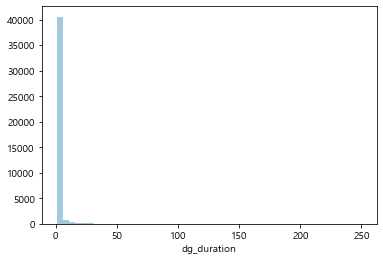

In [32]:
sns.distplot(request['dg_duration'], kde=False)

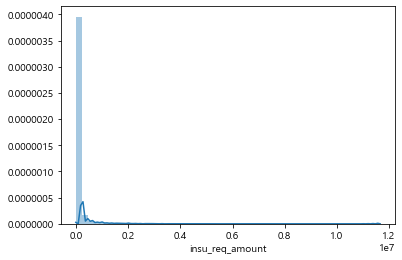

In [33]:
sns.distplot(request['insu_req_amount'], kde=True)

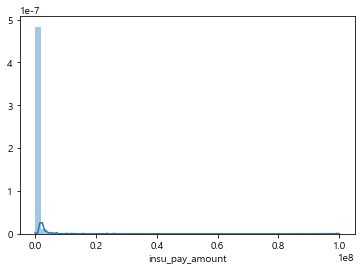

In [34]:
sns.distplot(request['insu_pay_amount'], kde=True)

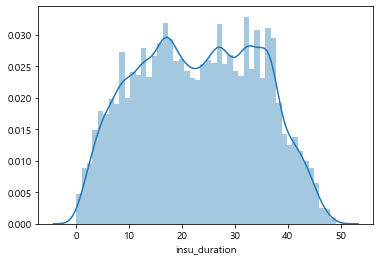

In [35]:
sns.distplot(request['insu_duration'], kde=True)

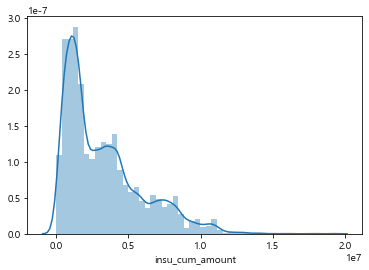

In [36]:
sns.distplot(request['insu_cum_amount'], kde=True)

In [37]:
request.describe()

,age,req_id_seq,dg_duration,insu_req_amount,insu_pay_amount,insu_duration,insu_cum_amount
count,42243.000000,42243.000000,42243.000000,4.224300e+04,4.224300e+04,42243.000000,4.224300e+04
mean,49.360746,4.615084,1.656985,9.368802e+04,4.677977e+05,23.087494,3.243035e+06
std,8.683294,6.912192,4.283311,3.145936e+05,1.720453e+06,11.241436,2.680750e+06
min,15.000000,1.000000,1.000000,0.000000e+00,5.000000e+01,0.000000,0.000000e+00
25%,45.000000,1.000000,1.000000,1.600000e+03,5.179200e+04,14.000000,1.150000e+06
50%,51.000000,2.000000,1.000000,1.673000e+04,1.453650e+05,23.000000,2.420000e+06
75%,55.000000,5.000000,1.000000,6.500000e+04,3.812890e+05,32.000000,4.500000e+06
max,69.000000,75.000000,250.000000,1.164998e+07,1.000000e+08,49.000000,1.920000e+07


In [38]:
request['age'].describe()

count    42243.000000
mean        49.360746
std          8.683294
min         15.000000
25%         45.000000
50%         51.000000
75%         55.000000
max         69.000000
Name: age, dtype: float64

In [39]:
request['dg_duration'].describe()

count    42243.000000
mean         1.656985
std          4.283311
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        250.000000
Name: dg_duration, dtype: float64

In [40]:
request['insu_req_amount'].describe()

count    4.224300e+04
mean     9.368802e+04
std      3.145936e+05
min      0.000000e+00
25%      1.600000e+03
50%      1.673000e+04
75%      6.500000e+04
max      1.164998e+07
Name: insu_req_amount, dtype: float64

In [41]:
request['insu_pay_amount'].describe()

count    4.224300e+04
mean     4.677977e+05
std      1.720453e+06
min      5.000000e+01
25%      5.179200e+04
50%      1.453650e+05
75%      3.812890e+05
max      1.000000e+08
Name: insu_pay_amount, dtype: float64

In [42]:
request['insu_duration'].describe()

count    42243.000000
mean        23.087494
std         11.241436
min          0.000000
25%         14.000000
50%         23.000000
75%         32.000000
max         49.000000
Name: insu_duration, dtype: float64

In [43]:
request['insu_cum_amount'].describe()

count    4.224300e+04
mean     3.243035e+06
std      2.680750e+06
min      0.000000e+00
25%      1.150000e+06
50%      2.420000e+06
75%      4.500000e+06
max      1.920000e+07
Name: insu_cum_amount, dtype: float64

### 고객별 보험별 청구금액으로 예상지급보험금 계산

In [87]:
insu_actual_expense_df = pd.DataFrame(request['insu_pay_amount'].groupby([request['customer_id'], request['insu_prod_name']]).unique())
insu_actual_expense_df

,,insu_pay_amount
customer_id,insu_prod_name,
C112379,가족 만족 보험 1,"[724498, 490079]"
C112404,가족 만족 보험 1,[1008750]
C112411,가족 만족 보험 1,[553680]
C112570,통합보험 +1,"[412210, 2440069]"
C112727,통합보험 +1,[201880]
...,...,...
C134197,건강보험,"[63100, 1637948]"
C134221,건강보험,"[1103700, 1714068, 2176283, 836361, 1060767, 5..."
C134227,건강보험,"[42600, 11120, 56300, 152008]"


In [47]:
insu_prod_name_list = list(set(request['insu_prod_name']))
customer_id_list = list(set(request['customer_id']))

In [48]:
for insu_prod_name in insu_prod_name_list:
    for customer_id in customer_id_list:
        request_subset = request[(request['insu_prod_name'] == insu_prod_name) & (request['customer_id'] == customer_id)]
        if request_subset.size == 0:
            continue
        insu_actual_expense = request_subset['insu_pay_amount'].unique().sum()
        print(insu_prod_name, customer_id, insu_actual_expense)

건강 보살핌 C117780 300000
건강 보살핌 C121178 1408325
건강 보살핌 C116605 2307750
건강 보살핌 C129391 4989500
건강 보살핌 C124954 37700
건강 보살핌 C117607 94040
건강 보살핌 C113788 1860582
건강 보살핌 C115997 314550
건강 보살핌 C127740 360300
건강 보살핌 C125458 306556
건강 보살핌 C124596 203422
건강 보살핌 C117719 970928
건강 보살핌 C121860 82300
건강 보살핌 C119492 2065130
건강 보살핌 C126563 315186
건강 보살핌 C132744 2670460
건강 보살핌 C131111 300000
건강 보살핌 C130421 67700
건강 보살핌 C125389 340000
건강 보살핌 C129213 159300
건강 보살핌 C113334 223000
건강 보살핌 C126095 62815
건강 보살핌 C117998 1140460
건강 보살핌 C130114 249906
건강 보살핌 C114180 90640
건강 보살핌 C117942 196100
건강 보살핌 C116977 1549210
건강 보살핌 C117308 1260451
건강 보살핌 C128902 3000000
건강 보살핌 C132716 269800
건강 보살핌 C126177 1191079
건강 보살핌 C117594 1338240
건강 보살핌 C117666 77000
건강 보살핌 C128425 5580035
건강 보살핌 C132192 1696809
건강 보살핌 C131064 606895
건강 보살핌 C126330 15070
건강 보살핌 C126979 37500
건강 보살핌 C116748 1608241
건강 보살핌 C125835 38700
건강 보살핌 C127877 1323400
건강 보살핌 C125071 172430
건강 보살핌 C126026 3700
건강 보살핌 C131072 998410
건강 보살핌 C117685 1853395
건강 보살

All My Life 2 C128139 143630
All My Life 2 C125911 179566
All My Life 2 C123367 1011329
All My Life 2 C123137 2700
All My Life 2 C125948 1438616
All My Life 2 C124932 397577
All My Life 2 C129886 1788512
All My Life 2 C128500 182300
All My Life 2 C128653 146636
All My Life 2 C126680 81287
All My Life 2 C125819 529872
All My Life 2 C124289 331105
All My Life 2 C125976 97500
All My Life 2 C124373 1461298
All My Life 2 C124694 180651
All My Life 2 C127395 346831
All My Life 2 C129596 95045
All My Life 2 C125053 6092
All My Life 2 C127849 280502
All My Life 2 C128860 859455
All My Life 2 C129294 1327066
All My Life 2 C126786 1501651
All My Life 2 C117940 1835527
All My Life 2 C128027 10300283
All My Life 2 C128054 285339
All My Life 2 C130864 231955
All My Life 2 C127411 27500
All My Life 2 C125779 335129
All My Life 2 C127629 240447
All My Life 2 C123198 4792024
All My Life 2 C126460 41812
All My Life 2 C131745 102750
All My Life 2 C127456 336638
All My Life 2 C126838 313463
All My Life 2

조심조심 보험 4 C121600 962026
조심조심 보험 4 C120926 708468
조심조심 보험 4 C115728 55012
조심조심 보험 4 C121172 344600
조심조심 보험 4 C118847 100000
조심조심 보험 4 C125542 36010917
조심조심 보험 4 C124001 1224075
조심조심 보험 4 C119359 393660
조심조심 보험 4 C114809 128100
조심조심 보험 4 C122316 607756
조심조심 보험 4 C133175 768010
조심조심 보험 4 C129744 712705
조심조심 보험 4 C113311 468000
조심조심 보험 4 C121608 47200
조심조심 보험 4 C123350 917480
조심조심 보험 4 C129747 334150
조심조심 보험 4 C121245 357600
조심조심 보험 4 C123531 2461754
조심조심 보험 4 C126784 417288
조심조심 보험 4 C121409 940679
조심조심 보험 4 C126279 1248509
조심조심 보험 4 C127144 543450
조심조심 보험 4 C132890 115474
조심조심 보험 4 C120174 343330
조심조심 보험 4 C118030 1663111
조심조심 보험 4 C121370 174800
조심조심 보험 4 C127273 88100
조심조심 보험 4 C133098 10576369
조심조심 보험 4 C115054 94100
조심조심 보험 4 C120190 2648594
조심조심 보험 4 C124473 489414
조심조심 보험 4 C123448 325680
조심조심 보험 4 C127415 797500
조심조심 보험 4 C124782 68000
조심조심 보험 4 C124878 760235
조심조심 보험 4 C126462 18000
조심조심 보험 4 C116635 657844
조심조심 보험 4 C130996 1385370
조심조심 보험 4 C130467 275240
조심조심 보험 4 C117984 111

조심조심 보험 4 C132856 274183
조심조심 보험 4 C127276 1218351
조심조심 보험 4 C125901 575120
조심조심 보험 4 C127161 4558669
조심조심 보험 4 C125466 1010140
조심조심 보험 4 C118287 1149118
조심조심 보험 4 C131776 3348917
조심조심 보험 4 C129196 549734
조심조심 보험 4 C124210 225370
조심조심 보험 4 C122291 5132481
조심조심 보험 4 C120077 153900
조심조심 보험 4 C133081 303670
조심조심 보험 4 C115400 84000
조심조심 보험 4 C114966 393988
조심조심 보험 4 C115575 191900
조심조심 보험 4 C113724 800
조심조심 보험 4 C113374 22064
조심조심 보험 4 C129181 890000
조심조심 보험 4 C120169 96400
조심조심 보험 4 C120411 213200
조심조심 보험 4 C122312 293500
조심조심 보험 4 C124166 130800
조심조심 보험 4 C112988 435552
조심조심 보험 4 C127776 2845249
조심조심 보험 4 C119006 2315384
조심조심 보험 4 C113574 920733
조심조심 보험 4 C113605 956800
조심조심 보험 4 C124151 799583
조심조심 보험 4 C118712 233865
조심조심 보험 4 C127885 1924052
조심조심 보험 4 C120343 202150
조심조심 보험 4 C114850 243400
조심조심 보험 4 C130048 1107794
조심조심 보험 4 C123520 32100
조심조심 보험 4 C124928 322696
조심조심 보험 4 C133843 948382
조심조심 보험 4 C133445 32900
조심조심 보험 4 C113670 339070
조심조심 보험 4 C120645 3893881
조심조심 보험 4 C122383 3107

조심조심 보험 4 C118351 275050
조심조심 보험 4 C133978 2683624
조심조심 보험 4 C129215 903340
조심조심 보험 4 C124514 208200
조심조심 보험 4 C128156 487300
조심조심 보험 4 C126129 532260
조심조심 보험 4 C115216 509960
조심조심 보험 4 C125530 3361421
조심조심 보험 4 C129682 190400
조심조심 보험 4 C125672 680997
조심조심 보험 4 C119884 77592
조심조심 보험 4 C125614 891673
조심조심 보험 4 C131636 275810
조심조심 보험 4 C123394 3070946
조심조심 보험 4 C118078 837850
조심조심 보험 4 C127047 251500
조심조심 보험 4 C125564 130540
조심조심 보험 4 C129202 92600
조심조심 보험 4 C114154 327180
조심조심 보험 4 C116121 26400
조심조심 보험 4 C115914 2623912
조심조심 보험 4 C115138 515528
조심조심 보험 4 C119751 529573
조심조심 보험 4 C115936 300000
조심조심 보험 4 C114102 537404
조심조심 보험 4 C125753 548600
조심조심 보험 4 C119348 466788
조심조심 보험 4 C118290 700450
조심조심 보험 4 C113616 36000
조심조심 보험 4 C113033 125894
조심조심 보험 4 C132036 1125033
조심조심 보험 4 C115929 104590
조심조심 보험 4 C113725 1400340
조심조심 보험 4 C116744 377400
조심조심 보험 4 C115036 48200
조심조심 보험 4 C113202 687520
조심조심 보험 4 C124418 855390
조심조심 보험 4 C131479 630699
조심조심 보험 4 C128024 1443746
조심조심 보험 4 C132633 45652

조심조심 보험 4 C131048 215000
조심조심 보험 4 C131763 278600
조심조심 보험 4 C125232 20360
조심조심 보험 4 C132243 29340
조심조심 보험 4 C122021 111880
조심조심 보험 4 C117210 91290
조심조심 보험 4 C132201 472795
조심조심 보험 4 C113720 58300
조심조심 보험 4 C114611 1176619
조심조심 보험 4 C131743 74600
조심조심 보험 4 C115338 566559
조심조심 보험 4 C115612 53950
조심조심 보험 4 C128202 155000
조심조심 보험 4 C131877 520480
조심조심 보험 4 C125459 892960
조심조심 보험 4 C125372 2802187
조심조심 보험 4 C126212 139500
조심조심 보험 4 C133404 301216
조심조심 보험 4 C116377 215851
조심조심 보험 4 C130837 229560
조심조심 보험 4 C115669 2953123
조심조심 보험 4 C126284 192760
조심조심 보험 4 C113758 250000
조심조심 보험 4 C130595 438550
조심조심 보험 4 C120623 771321
조심조심 보험 4 C121518 528740
조심조심 보험 4 C113639 2635250
조심조심 보험 4 C126354 880501
조심조심 보험 4 C121607 387883
조심조심 보험 4 C114369 56480
조심조심 보험 4 C129640 88250
조심조심 보험 4 C123268 131402
조심조심 보험 4 C130585 507220
조심조심 보험 4 C126682 620235
조심조심 보험 4 C122589 263000
조심조심 보험 4 C123756 513702
조심조심 보험 4 C121858 744750
조심조심 보험 4 C125532 1728400
조심조심 보험 4 C115689 1053250
조심조심 보험 4 C132613 286600
조심

안심보험 C116359 1141362
안심보험 C116356 1550463
안심보험 C126923 200000
안심보험 C119981 20000
안심보험 C117382 484140
안심보험 C120040 706000
안심보험 C117806 26500
안심보험 C130941 5400
안심보험 C121044 5000000
안심보험 C130047 338500
안심보험 C124513 1268780
안심보험 C125912 152852
안심보험 C125516 2211911
안심보험 C121042 164510
안심보험 C130747 1157890
안심보험 C121305 99100
안심보험 C121621 388005
안심보험 C123875 1687400
안심보험 C126095 71647
안심보험 C129324 66500
안심보험 C132171 618968
안심보험 C116342 565780
안심보험 C118266 2152326
안심보험 C128191 228048
안심보험 C129241 6086502
안심보험 C119951 726144
안심보험 C126412 2786510
안심보험 C128229 100000
안심보험 C120702 204545
안심보험 C121090 513082
안심보험 C125720 52234
안심보험 C117343 1052963
안심보험 C121362 119630
안심보험 C126206 3423729
안심보험 C121411 498978
안심보험 C129729 447168
안심보험 C128958 120000
안심보험 C118167 354565
안심보험 C126948 80000
안심보험 C119490 230000
안심보험 C113001 3156750
안심보험 C114759 200000
안심보험 C131822 1143374
안심보험 C131102 1219119
안심보험 C129499 167208
안심보험 C116974 200570
안심보험 C128448 548202
안심보험 C128027 705771
안심보험 C127511 1435210
안심보험 C130748 

평생 건강 보장 1 C120168 294801
평생 건강 보장 1 C119277 380000
평생 건강 보장 1 C120556 175180
평생 건강 보장 1 C126937 101991
평생 건강 보장 1 C126744 300000
평생 건강 보장 1 C124783 943236
평생 건강 보장 1 C129377 48268
평생 건강 보장 1 C129904 27420
평생 건강 보장 1 C129530 3166010
평생 건강 보장 1 C120172 210700
평생 건강 보장 1 C124664 186979
평생 건강 보장 1 C125828 15200
평생 건강 보장 1 C131189 1109610
평생 건강 보장 1 C131458 392600
평생 건강 보장 1 C125071 200000
평생 건강 보장 1 C128651 2542414
평생 건강 보장 1 C126058 420208
평생 건강 보장 1 C129365 262950
평생 건강 보장 1 C126317 2623900
평생 건강 보장 1 C127024 243805
평생 건강 보장 1 C129254 1667254
평생 건강 보장 1 C121844 212940
평생 건강 보장 1 C117185 8673084
평생 건강 보장 1 C127125 200000
평생 건강 보장 1 C126543 1934467
평생 건강 보장 1 C128662 873676
평생 건강 보장 1 C119651 750316
평생 건강 보장 1 C130766 198686
평생 건강 보장 1 C131167 2308140
평생 건강 보장 1 C127335 157650
평생 건강 보장 1 C131066 306950
평생 건강 보장 1 C127252 1013786
평생 건강 보장 1 C129146 108130
평생 건강 보장 1 C127090 2261050
평생 건강 보장 1 C126737 626750
평생 건강 보장 1 C129404 1292230
평생 건강 보장 1 C127339 130116
평생 건강 보장 1 C128429 2964506
평생 

평생 건강 보장 1 C120741 1629666
평생 건강 보장 1 C125770 3275837
평생 건강 보장 1 C128864 38291
평생 건강 보장 1 C127404 868780
평생 건강 보장 1 C131054 1731657
평생 건강 보장 1 C126840 420000
평생 건강 보장 1 C120481 738460
평생 건강 보장 1 C123847 534431
평생 건강 보장 1 C117287 347146
평생 건강 보장 1 C128817 1000
평생 건강 보장 1 C117096 129000
평생 건강 보장 1 C119626 105180
평생 건강 보장 1 C119974 3713710
평생 건강 보장 1 C119901 1274396
평생 건강 보장 1 C114559 445244
평생 건강 보장 1 C129102 442540
평생 건강 보장 1 C124951 198895
평생 건강 보장 1 C130589 100000
평생 건강 보장 1 C127418 243280
평생 건강 보장 1 C118703 757100
평생 건강 보장 1 C121897 33200
평생 건강 보장 1 C130462 978450
평생 건강 보장 1 C130171 655895
평생 건강 보장 1 C128092 302964
평생 건강 보장 1 C124248 3403149
평생 건강 보장 1 C125308 334907
평생 건강 보장 1 C131206 1455661
평생 건강 보장 1 C116600 2462025
평생 건강 보장 1 C127127 189769
평생 건강 보장 1 C124972 1262396
평생 건강 보장 1 C117282 195602
평생 건강 보장 1 C127004 1330968
평생 건강 보장 1 C120447 1083660
평생 건강 보장 1 C130547 3284500
평생 건강 보장 1 C127327 90000
평생 건강 보장 1 C129299 714843
평생 건강 보장 1 C120827 129968
평생 건강 보장 1 C125269 37900
평생 건강 

울라트 보험 C128642 959492
울라트 보험 C124155 1466753
울라트 보험 C126285 1215604
울라트 보험 C133116 2945588
울라트 보험 C115807 2910838
울라트 보험 C126723 6876334
울라트 보험 C117231 3775087
울라트 보험 C129383 1386222
울라트 보험 C119572 2408431
울라트 보험 C129031 470000
울라트 보험 C129064 490790
울라트 보험 C126534 625514
울라트 보험 C127865 347810
울라트 보험 C129232 139170
울라트 보험 C130613 231957
울라트 보험 C132460 454334
울라트 보험 C125381 8467
울라트 보험 C115666 187830
울라트 보험 C126829 500998
울라트 보험 C122123 250000
울라트 보험 C115264 330833
울라트 보험 C125863 3815
울라트 보험 C119683 100000
울라트 보험 C126076 327800
울라트 보험 C132546 100000
울라트 보험 C128353 288100
울라트 보험 C130594 750000
울라트 보험 C130720 21550
울라트 보험 C125920 5701459
울라트 보험 C115852 81718994
울라트 보험 C127226 154482
울라트 보험 C128840 32920537
울라트 보험 C121051 498968
울라트 보험 C114191 3091184
울라트 보험 C113572 230000
울라트 보험 C123872 3061847
울라트 보험 C127771 250000
울라트 보험 C133567 190930
울라트 보험 C126507 2505366
울라트 보험 C123667 12701416
울라트 보험 C116881 350300
울라트 보험 C133535 22600
울라트 보험 C125981 279300
울라트 보험 C130652 812690
울라트 보험 C115604 32659

울라트 보험 C126798 1875824
울라트 보험 C132700 404950
울라트 보험 C124366 200000
울라트 보험 C115032 976920
울라트 보험 C130922 1441581
울라트 보험 C118207 100000
울라트 보험 C125891 921262
울라트 보험 C123977 49700
울라트 보험 C126890 2603575
울라트 보험 C124750 578410
울라트 보험 C132053 80000
울라트 보험 C112875 136850
울라트 보험 C114591 269600
울라트 보험 C134184 227708
울라트 보험 C126639 300000
울라트 보험 C124252 43700
울라트 보험 C129432 300000
울라트 보험 C130699 165740
울라트 보험 C125108 1625825
울라트 보험 C115721 1073106
울라트 보험 C131547 572305
울라트 보험 C118424 453438
울라트 보험 C126843 1781409
울라트 보험 C129894 365100
울라트 보험 C132286 953854
울라트 보험 C126122 1304317
울라트 보험 C118346 100000
울라트 보험 C125081 232800
울라트 보험 C118971 98870
울라트 보험 C129745 229060
울라트 보험 C115160 195770
울라트 보험 C127018 343337
울라트 보험 C118989 200000
울라트 보험 C116806 200000
울라트 보험 C127683 233952
울라트 보험 C119933 405151
울라트 보험 C125832 413710
울라트 보험 C118210 55100
울라트 보험 C126650 882960
울라트 보험 C127419 501732
울라트 보험 C129676 2352623
울라트 보험 C134073 456350
울라트 보험 C113432 852092
울라트 보험 C115016 945086
울라트 보험 C118608 419549
울라트 보험 

All My Life 1 C119144 846253
All My Life 1 C126558 816154
All My Life 1 C114491 100000
All My Life 1 C127050 596684
All My Life 1 C123902 996400
All My Life 1 C127137 28300
All My Life 1 C128985 420900
All My Life 1 C131222 294210
All My Life 1 C119531 57300
All My Life 1 C130380 150200
All My Life 1 C131965 25200
All My Life 1 C123803 10756988
All My Life 1 C118144 248349
All My Life 1 C117478 307424
All My Life 1 C125554 2616748
All My Life 1 C127452 259091
All My Life 1 C133339 3437000
All My Life 1 C119544 459430
All My Life 1 C127215 4031630
All My Life 1 C125176 116143
All My Life 1 C126744 100000
All My Life 1 C124672 386700
All My Life 1 C128319 210100
All My Life 1 C126762 33600
All My Life 1 C130357 6627932
All My Life 1 C121500 1964850
All My Life 1 C131546 306900
All My Life 1 C130375 272230
All My Life 1 C126809 1289812
All My Life 1 C128662 200000
All My Life 1 C121388 1118127
All My Life 1 C131217 185430
All My Life 1 C127455 371828
All My Life 1 C131030 370900
All My Li

건강보험 C127154 14160
건강보험 C124266 1018000
건강보험 C126070 255110
건강보험 C124197 1190145
건강보험 C127242 1034110
건강보험 C128213 792920
건강보험 C119295 283620
건강보험 C121562 82614
건강보험 C130155 32200
건강보험 C134033 1500
건강보험 C118756 237840
건강보험 C128172 110000
건강보험 C126109 436200
건강보험 C130301 354870
건강보험 C128984 2532277
건강보험 C130608 220700
건강보험 C132010 35580
건강보험 C123314 578099
건강보험 C123662 2005355
건강보험 C126815 372360
건강보험 C125376 3434552
건강보험 C129268 654308
건강보험 C127447 4215261
건강보험 C127194 1091600
건강보험 C114598 813073
건강보험 C124526 200000
건강보험 C115545 274700
건강보험 C113947 300000
건강보험 C132734 200000
건강보험 C129347 231550
건강보험 C127238 1138000
건강보험 C128937 132500
건강보험 C134221 9951053
건강보험 C128257 848237
건강보험 C131646 462399
건강보험 C128490 526950
건강보험 C131121 13500
건강보험 C125784 704310
건강보험 C130234 220000
건강보험 C116713 896974
건강보험 C122295 80400
건강보험 C115037 321980
건강보험 C131334 893720
건강보험 C118274 860330
건강보험 C119681 312700
건강보험 C120603 1465250
건강보험 C132153 100000
건강보험 C133436 37200
건강보험 C128105 1321270
건강보험 C130656 2578

건강보험 C115080 874800
건강보험 C116063 326300
건강보험 C132319 858781
건강보험 C129286 91500
건강보험 C115204 415400
건강보험 C127097 266582
건강보험 C123600 300300
건강보험 C120581 1289246
건강보험 C118564 200000
건강보험 C125216 209640
건강보험 C127224 1885592
건강보험 C131548 96300
건강보험 C124333 759210
건강보험 C123406 490400
건강보험 C118230 727510
건강보험 C118888 689015
건강보험 C115647 520000
건강보험 C129723 261050
건강보험 C132996 220000
건강보험 C124281 1486807
건강보험 C119700 225350
건강보험 C131340 263440
건강보험 C114399 190400
건강보험 C132223 21170
건강보험 C117457 265200
건강보험 C124974 357200
건강보험 C121676 209580
건강보험 C133195 301700
건강보험 C118763 342860
건강보험 C112941 4198703
건강보험 C127158 1020780
건강보험 C131149 1164380
건강보험 C129995 276700
건강보험 C123423 362605
건강보험 C127308 5229995
건강보험 C124032 3013623
건강보험 C121751 1226810
건강보험 C123312 981941
건강보험 C129356 9235070
건강보험 C119071 257500
건강보험 C131817 44400
건강보험 C129104 215900
건강보험 C129562 783220
건강보험 C131724 2227352
건강보험 C126172 1512301
건강보험 C129393 3036000
건강보험 C132908 277490
건강보험 C114114 1979123
건강보험 C121401 304760
건강보험 C1308

In [53]:
insu_prod_name_list = list(set(request['insu_prod_name']))
customer_id_list = list(set(request['customer_id']))

with open('insu_pred_expense.csv', 'w') as f:
    column_name = ','.join(['insu_prod_name', 'customer_id', 'insu_actual_expense']) + '\n'
    f.write(column_name)
    for insu_prod_name in insu_prod_name_list:
        for customer_id in customer_id_list:
            request_subset = request[(request['insu_prod_name'] == insu_prod_name) & (request['customer_id'] == customer_id)]
            if request_subset.size == 0:
                continue
            insu_actual_expense = request_subset['insu_pay_amount'].unique().sum()
            line = ','.join([str(insu_prod_name), str(customer_id), str(insu_actual_expense)]) + '\n'
            f.write(line)

In [112]:
insu_pred_expense = pd.read_csv("insu_pred_expense.csv", encoding='euc-kr')
insu_pred_expense.head()

,insu_prod_name,customer_id,insu_actual_expense
0,건강 보살핌,C117780,300000
1,건강 보살핌,C121178,1408325
2,건강 보살핌,C116605,2307750
3,건강 보살핌,C129391,4989500
4,건강 보살핌,C124954,37700


In [113]:
insu_prod_name_list

['건강 보살핌',
 '통합보험 +2',
 '평생 보험 2',
 'All My Life 2',
 '조심조심 보험 4',
 '건강보험 3',
 '조심조심 보험 2',
 '단체보험(상해)',
 '가족 만족 보험 2',
 '안심보험',
 '평생 보험 1',
 '통합보험 +3',
 '평생 건강 보장 1',
 '가족 만족 보험 2+',
 '가족 만족 보험 1',
 '조심조심 보험 1',
 '울라트 보험',
 'All My Life 1',
 '건강보험',
 '건강+행복 보험',
 '통합보험 +1']

In [119]:
insu_pred_expense_subset = insu_pred_expense[insu_pred_expense['insu_prod_name'] == '건강 보살핌']

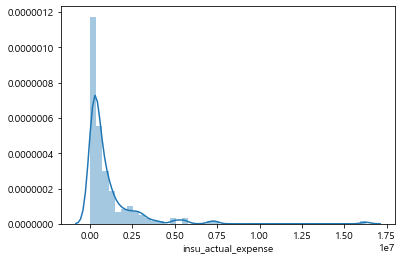

In [120]:
sns.distplot(insu_pred_expense_subset['insu_actual_expense'], kde=True)

In [121]:
insu_pred_expense_subset = insu_pred_expense[insu_pred_expense['insu_prod_name'] == '통합보험 +2']

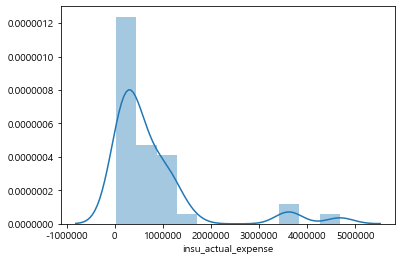

In [122]:
sns.distplot(insu_pred_expense_subset['insu_actual_expense'], kde=True)

In [125]:
insu_pred_expense_subset = insu_pred_expense[insu_pred_expense['insu_prod_name'] == '평생 보험 2']

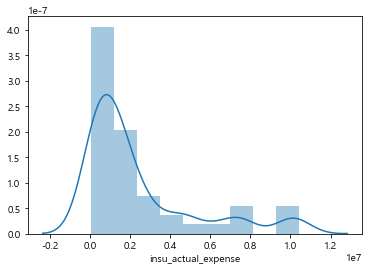

In [126]:
sns.distplot(insu_pred_expense_subset['insu_actual_expense'], kde=True)

In [127]:
insu_pred_expense[insu_pred_expense['insu_prod_name'] == '평생 보험 2']['insu_actual_expense'].median()

1263075.0

In [128]:
insu_pred_expense_list = []
for insu_prod_name in insu_prod_name_list:
    insu_prod_subset = insu_pred_expense[insu_pred_expense['insu_prod_name'] == insu_prod_name]
    insu_pred_expense_median = insu_prod_subset['insu_actual_expense'].median()
    insu_pred_expense_list.append(insu_pred_expense_median)

In [129]:
print(insu_pred_expense_list)

[494376.0, 418900.0, 1263075.0, 182300.0, 458250.0, 915890.0, 585350.0, 460220.0, 1210613.5, 415603.5, 693064.0, 378175.5, 378705.0, 412875.0, 1090506.5, 409386.0, 420000.0, 367130.0, 468742.0, 250341.0, 947740.0]


In [112]:
insu_pred_expense = pd.read_csv("insu_pred_expense.csv", encoding='euc-kr')
insu_pred_expense.head()

,insu_prod_name,customer_id,insu_actual_expense
0,건강 보살핌,C117780,300000
1,건강 보살핌,C121178,1408325
2,건강 보살핌,C116605,2307750
3,건강 보살핌,C129391,4989500
4,건강 보살핌,C124954,37700


In [130]:
insu_pred_expense_final = pd.DataFrame({'insu_prod_name':insu_prod_name_list,
                                       'insu_pred_expense':insu_pred_expense_list})
insu_pred_expense_final

,insu_prod_name,insu_pred_expense
0,건강 보살핌,494376.0
1,통합보험 +2,418900.0
2,평생 보험 2,1263075.0
3,All My Life 2,182300.0
4,조심조심 보험 4,458250.0
5,건강보험 3,915890.0
6,조심조심 보험 2,585350.0
7,단체보험(상해),460220.0
8,가족 만족 보험 2,1210613.5
9,안심보험,415603.5


### 청구대비 과다지급 계산하여 청구대비 과다지급 고객 추출

청구대비 과다지급(insu_risk_expense) = 예상지급보험금(insu_pred_expense) + 실제지급보험금(insu_actual_expense)

In [133]:
insu_risk = pd.merge(insu_pred_expense, insu_pred_expense_final, on='insu_prod_name')
insu_risk

,insu_prod_name,customer_id,insu_actual_expense,insu_pred_expense
0,건강 보살핌,C117780,300000,494376.0
1,건강 보살핌,C121178,1408325,494376.0
2,건강 보살핌,C116605,2307750,494376.0
3,건강 보살핌,C129391,4989500,494376.0
4,건강 보살핌,C124954,37700,494376.0
...,...,...,...,...
4754,통합보험 +1,C126693,2545520,947740.0
4755,통합보험 +1,C114123,587440,947740.0
4756,통합보험 +1,C127002,924657,947740.0
4757,통합보험 +1,C127093,24379,947740.0


In [135]:
insu_risk['insu_risk_expense'] = insu_risk['insu_pred_expense'] - insu_risk['insu_actual_expense']
insu_risk

,insu_prod_name,customer_id,insu_actual_expense,insu_pred_expense,insu_risk_expense
0,건강 보살핌,C117780,300000,494376.0,194376.0
1,건강 보살핌,C121178,1408325,494376.0,-913949.0
2,건강 보살핌,C116605,2307750,494376.0,-1813374.0
3,건강 보살핌,C129391,4989500,494376.0,-4495124.0
4,건강 보살핌,C124954,37700,494376.0,456676.0
...,...,...,...,...,...
4754,통합보험 +1,C126693,2545520,947740.0,-1597780.0
4755,통합보험 +1,C114123,587440,947740.0,360300.0
4756,통합보험 +1,C127002,924657,947740.0,23083.0
4757,통합보험 +1,C127093,24379,947740.0,923361.0


In [140]:
insu_risk.to_excel('C:/Users/PIAI/insu_risk.xlsx', index=False, encoding='utf-8')

In [142]:
risk_customer_id = insu_risk[insu_risk['insu_risk_expense'] < 0].loc[:, 'customer_id']
risk_customer_id

1       C121178
2       C116605
3       C129391
6       C113788
11      C117719
         ...   
4742    C125165
4743    C114658
4751    C117917
4754    C126693
4758    C123785
Name: customer_id, Length: 2373, dtype: object

In [143]:
risk_customer_id.to_excel('C:/Users/PIAI/risk_customer_id.xlsx', index=False, encoding='utf-8')